In [45]:
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
from nltk.corpus import wordnet
import operator
import random
import nltk
# nltk.download('stopwords')
# nltk.download('words')
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns',100,'max_rows',10000)

## Question 1

In [46]:
tweet=pd.read_csv("tweets-dataset.csv")
print(tweet.shape)
print(tweet.columns)

(24521, 1)
Index(['Sentence'], dtype='object')


In [47]:
tokens=[]
tokenizer=TweetTokenizer(strip_handles=True)
for i in range(tweet.shape[0]):
    tokens+=tokenizer.tokenize(tweet.loc[i,'Sentence'])
tokens=pd.Series(tokens)

In [48]:
types=pd.Series(tokens.unique())
# print(types)

In [49]:
print('Length of Tokens is:', len(tokens))
print('Length of Types is:', len(types))

Length of Tokens is: 353565
Length of Types is: 45125


In [50]:
ttr=len(types)/len(tokens)
print(ttr)

0.12762858314595618


## Question 2

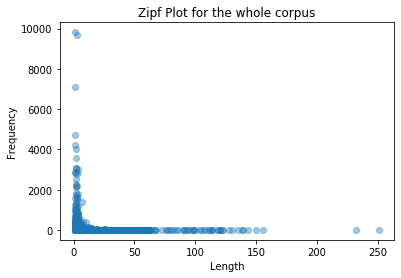

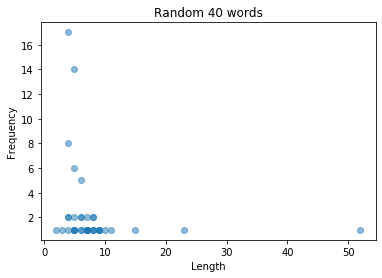

In [59]:
# for whole
t,count=np.unique(tokens, return_counts=True)
frequency=dict(zip(t,count))
sorted_x = sorted(frequency.items(), key=operator.itemgetter(1),reverse=True)
len1=[]
freq1=[]
for i in freq:
    len1.append(len(i))
    freq1.append(frequency[i])
plt.scatter(len1,freq1, alpha=0.4)
plt.title('Zipf Plot for the whole corpus')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()
#Random
ind=[random.randrange(0,len(frequency)) for j in range(40)]
len2=[]
freq2=[]
for i in ind:
    len2.append(len1[i])
    freq2.append(freq1[i])
plt.scatter(len2,freq2, alpha=0.5)
plt.title('Random 40 words')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

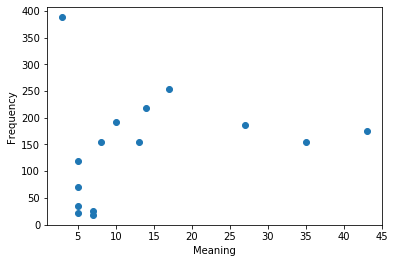

In [58]:
words=["mere","best","good","love","go","use","now","more","some","trend","up","out","idea","ticket","agree"]
x = [len(wordnet.synsets(val)) for val in words]
y = [freq[val] for val in words ]
plt.scatter(x,y)
plt.xlabel('Meaning')
plt.ylabel("Frequency")


## Question 3

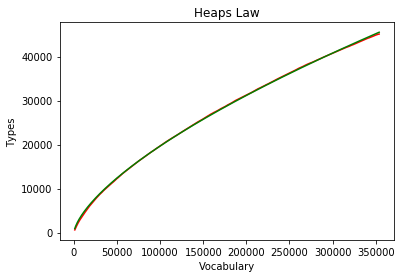

K=9.505280153270396 beta=0.6632520201240212


In [44]:
def test(x,k,beta):
    return k*(x**beta)
x=[]  # no of tokens
y=[]  # no of types
i=0
for j in range(0,len(tokens),1000):
    y.append(len(tokens.loc[:j+1000].unique()))
    if(len(x)):
        x.append(x[-1]+1000)
    else:
        x.append(1000)
param,param_corr=curve_fit(test,x,y)
ans=param[0]*(x**param[1])
plt.plot(x,y,'r-')
plt.plot(x,ans,'g-')
plt.title("Heaps Law")
plt.xlabel('Vocabulary')
plt.ylabel('Types')
plt.show()
print('K='+str(param[0])+' beta='+str(param[1]))